In [1]:
import numpy as np
from scipy.sparse.linalg import eigsh
import scipy.sparse as sparse
from scipy.linalg import eigh
import scipy.linalg
import matplotlib.pyplot as plt
from qutip import *
import math

In [2]:
#plt.rcParams['figure.figsize']=8.5,5.1
plt.rcParams['font.size']=20
plt.rcParams['lines.linewidth']=1.5
plt.rcParams['text.usetex']=True

In [3]:
#1st set - 1% n_g 2.2776% phi
T1=100.5*1/0.00195092
N_time_1=1000
Delta_t_1=T1/N_time_1
time_array_1=np.linspace(Delta_t_1,T1,N_time_1)

#2nd set - 1.5% n_g 3.4172% phi
T2=100.5*1/0.0029263
N_time_2=1000
Delta_t_2=T2/N_time_2
time_array_2=np.linspace(Delta_t_2,T2,N_time_2)

#3rd set - 0.5% n_g 1.1386% phi
T3=100.5*1/0.00097546
N_time_3=1000
Delta_t_3=T3/N_time_3
time_array_3=np.linspace(Delta_t_3,T3,N_time_3)

#4th set - 0.75% n_g 1.7081% phi
T4=100.5*1/0.00146320
N_time_4=1000
Delta_t_4=T4/N_time_4
time_array_4=np.linspace(Delta_t_4,T4,N_time_4)


In [5]:
#The order will be set 2 (1.5%), 1 (1%) , 4 (0.75%), 3 (0.5%)
InverseGaps=np.array([1/0.0029263,1/0.00195092,1/0.0014632,1/0.00097546])
print(InverseGaps)
Tmins=np.array([5.5*1/0.0029263,5.5*1/0.00195092,5.5*1/0.0014632,5.5*1/0.00097546])
print(Tmins)
lambdas=np.array([2152.88931,3229.245689,4305.63149,6458.491378]) #Freq
print(lambdas)

[ 341.72846256  512.57868083  683.43357026 1025.15736166]
[1879.5065441  2819.18274455 3758.88463641 5638.3654891 ]
[2152.88931  3229.245689 4305.63149  6458.491378]


In [ ]:
Overlap2_GS_NG_set1= np.load('T_EVOL_T100_5_INVGAP_Nt1000_NG_M20N50_EG_1_good.npy')
Overlap2_GS_NG_likephi0_set1 = np.load('T_EVOL_T100_5_INVGAP_Nt1000_NG_likephi0_M20N50_EG_1_good.npy')
Overlap2_GS_NG_likephi2_set1 = np.load('T_EVOL_T100_5_INVGAP_Nt1000_NG_likephi2_M20N50_EG_1_good.npy')
Overlap2_GS_PHIEXT_set1 = np.load('T_EVOL_T100_5_INVGAP_Nt1000_PHIEXT_M20N50_EG_1_good.npy')
Overlap2_GS_PHIEXT_likeng0_set1 = np.load('T_EVOL_T100_5_INVGAP_Nt1000_PHIEXT_likeng0_M20N50_EG_1_good.npy')
Overlap2_GS_PHIEXT_likeng2_set1 = np.load('T_EVOL_T100_5_INVGAP_Nt1000_PHIEXT_likeng2_M20N50_EG_1_good.npy')

Overlap2_GS_NG_set2= np.load('T_EVOL_T100_5_INVGAP_Nt1000_NG_M20N50_EG_2_good.npy')
Overlap2_GS_NG_likephi0_set2 = np.load('T_EVOL_T100_5_INVGAP_Nt1000_NG_likephi0_M20N50_EG_2_good.npy')
Overlap2_GS_NG_likephi2_set2 = np.load('T_EVOL_T100_5_INVGAP_Nt1000_NG_likephi2_M20N50_EG_2_good.npy')
Overlap2_GS_PHIEXT_set2 = np.load('T_EVOL_T100_5_INVGAP_Nt1000_PHIEXT_M20N50_EG_2_good.npy')
Overlap2_GS_PHIEXT_likeng0_set2 = np.load('T_EVOL_T100_5_INVGAP_Nt1000_PHIEXT_likeng0_M20N50_EG_2_good.npy')
Overlap2_GS_PHIEXT_likeng2_set2 = np.load('T_EVOL_T100_5_INVGAP_Nt1000_PHIEXT_likeng2_M20N50_EG_2_good.npy')

Overlap2_GS_NG_set3= np.load('T_EVOL_T100_5_INVGAP_Nt1000_NG_M20N50_EG_3_good.npy')
Overlap2_GS_NG_likephi0_set3 = np.load('T_EVOL_T100_5_INVGAP_Nt1000_NG_likephi0_M20N50_EG_3_good.npy')
Overlap2_GS_NG_likephi2_set3 = np.load('T_EVOL_T100_5_INVGAP_Nt1000_NG_likephi2_M20N50_EG_3good.npy')
Overlap2_GS_PHIEXT_set3 = np.load('T_EVOL_T100_5_INVGAP_Nt1000_PHIEXT_M20N50_EG_3_good.npy')
Overlap2_GS_PHIEXT_likeng0_set3 = np.load('T_EVOL_T100_5_INVGAP_Nt1000_PHIEXT_likeng0_M20N50_EG_3_good.npy')
Overlap2_GS_PHIEXT_likeng2_set3 = np.load('T_EVOL_T100_5_INVGAP_Nt1000_PHIEXT_likeng2_M20N50_EG_3_good.npy')

Overlap2_GS_NG_set4= np.load('T_EVOL_T100_5_INVGAP_Nt1000_NG_M20N50_EG_4_good.npy')
Overlap2_GS_NG_likephi0_set4 = np.load('T_EVOL_T100_5_INVGAP_Nt1000_NG_likephi0_M20N50_EG_4_good.npy')
Overlap2_GS_NG_likephi2_set4 = np.load('T_EVOL_T100_5_INVGAP_Nt1000_NG_likephi2_M20N50_EG_4_good.npy')
Overlap2_GS_PHIEXT_set4 = np.load('T_EVOL_T100_5_INVGAP_Nt1000_PHIEXT_M20N50_EG_4_good.npy')
Overlap2_GS_PHIEXT_likeng0_set4 = np.load('T_EVOL_T100_5_INVGAP_Nt1000_PHIEXT_likeng0_M20N50_EG_4_good.npy')
Overlap2_GS_PHIEXT_likeng2_set4 = np.load('T_EVOL_T100_5_INVGAP_Nt1000_PHIEXT_likeng2_M20N50_EG_4_good.npy')

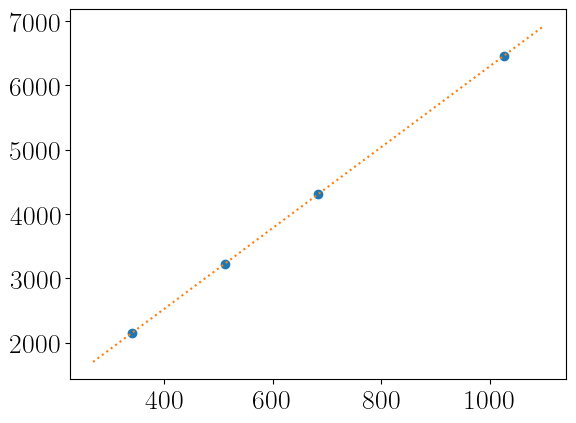

Slope: 6.3000000038860025
Intercept: -4.3423043997594695e-06
The linear equation is: 2.005352284194834 \pi x +  -4.3423043997594695e-06


In [27]:
plt.plot(InverseGaps,lambdas,"o")
slope, intercept = np.polyfit(InverseGaps, lambdas, 1)
x=np.arange(270,1100,1)
plt.plot(x,slope*x+intercept,ls='dotted')
plt.show()

# Print the slope and intercept
print("Slope:", slope)
print("Intercept:", intercept)
print("The linear equation is:",slope/np.pi,"\pi x + ",intercept)

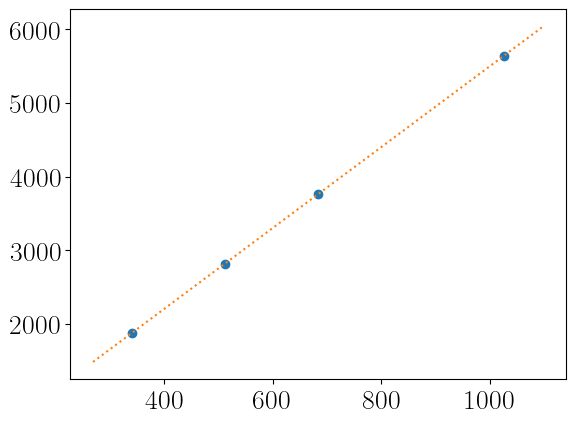

Slope: 5.5
Intercept: -2.5331018279615344e-12
The linear equation is: 5.5 x +  -2.5331018279615344e-12


In [28]:
plt.plot(InverseGaps,Tmins,"o")
slope, intercept = np.polyfit(InverseGaps, Tmins, 1)
x=np.arange(270,1100,1)
plt.plot(x,slope*x+intercept,ls='dotted')
plt.show()

# Print the slope and intercept
print("Slope:", slope)
print("Intercept:", intercept)
print("The linear equation is:",slope,"x + ",intercept)

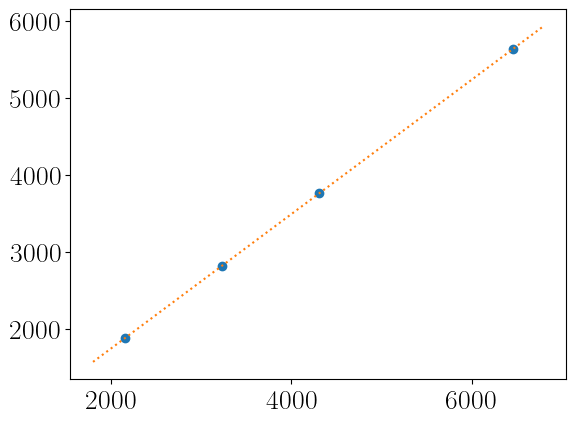

Slope: 0.8730158724773741
Intercept: 3.790898214045846e-06
The linear equation is: 0.8730158724773741 x +  3.790898214045846e-06


In [31]:
plt.plot(lambdas,Tmins,"o")
slope, intercept = np.polyfit(lambdas, Tmins, 1)
x=np.arange(1800,6800,1)
plt.plot(x,slope*x+intercept,ls='dotted')
plt.show()

# Print the slope and intercept
print("Slope:", slope)
print("Intercept:", intercept)
print("The linear equation is:",slope,"x + ",intercept)